In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
app_event = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/app_events.csv")
app_label = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/app_labels.csv")
label_cat = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/label_categories.csv")
event = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/events.csv")
phone = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/phone_brand_device_model.csv")
gatrain = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/gender_age_train.csv")
gatest = pd.read_csv("C:/Users/Felix/Documents/data/TalkingData Kaggle/gender_age_test.csv")

In [3]:
# Quick look at the data
print ('----------------------------------------------------')
print ('app_event:')
print (app_event.head())
print ('----------------------------------------------------')
print ('app_label:')
print (app_label.head())
print ('----------------------------------------------------')
print ('label_cat:')
print (label_cat.head())
print ('----------------------------------------------------')
print ('event:')
print (event.head())
print ('----------------------------------------------------')
print ('phone:')
print (phone.head())
print ('----------------------------------------------------')
print ('gatrain:')
print (gatrain.head())
print ('----------------------------------------------------')


----------------------------------------------------
app_event:
   event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1
----------------------------------------------------
app_label:
                app_id  label_id
0  7324884708820027918       251
1 -4494216993218550286       251
2  6058196446775239644       406
3  6058196446775239644       407
4  8694625920731541625       406
----------------------------------------------------
label_cat:
   label_id           category
0         1                NaN
1         2     game-game type
2         3   game-Game themes
3         4     game-Art Style
4         5  game-Leisure time
----------------------------------------------------
event:
   event_id     

In [4]:
# Frist look at the largest table 'app_event'
print ('app_event table has {} rows,'.format(app_event.shape[0]))
# The next line is very slow, so I commented it out. The result is 0.
# print 'with {} duplicated rows.'.format(sum(app_event.duplicated()))
print ('with 0 duplicated rows.')
# Check for missing values
print ('Number of missing values in each column:')
print (app_event.isnull().sum())
print ('There are {} unique apps,'.format(app_event.app_id.nunique()))
print ('with {} associated events.'.format(app_event.event_id.nunique())) 
app_id_list_app_event = Series(app_event.app_id.unique())

app_event table has 32473067 rows,
with 0 duplicated rows.
Number of missing values in each column:
event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64
There are 19237 unique apps,
with 1488096 associated events.


In [5]:
# All apps in this table should at least be installed
print (app_event.is_installed.value_counts())

1    32473067
Name: is_installed, dtype: int64


In [6]:
print (app_event.is_active.value_counts())

0    19740071
1    12732996
Name: is_active, dtype: int64


In [7]:
# Clearly, an app can have many associated events
vc_app = app_event.app_id.value_counts()
vc_app

 8693964245073640147    1151391
 5927333115845830913     898788
 4348659952760821294     795995
 628020936226491308      620659
 3433289601737013244     373186
-2320783822570582843     295619
 5729517255058371973     272353
 3683147815759994238     265823
 6284164581582112235     260639
 8948670408023620661     254316
-3955212733485100109     246759
 7348340405200054701     241397
 3717049149426646122     232618
 4244331088397413857     226472
-5720078949152207372     221899
 7460082553072507347     221756
-6590029937880196169     220237
-538061441862183033      215628
 33792862810792679       193287
 9112463114311278255     192712
-653184325026622087      184246
-5472633337921616096     177964
-196592189248911642      176140
-6689096779184407258     172843
-7377004479023402858     171707
-8504475857937456387     170511
-5839858269967688123     164802
-5305696816021977482     152631
 7167114343576723123     151790
 4521626599305779338     146025
                         ...   
-3941735

In [8]:
# Can an event be related to more than one apps?
vc_event = app_event.event_id.value_counts()
vc_event
# I still find it strange an event can be related to 300 apps, it could reveal some interesting information
# if we figure out the cause.

3215932    320
1827617    304
2849072    304
2325136    303
3085011    303
1923040    303
2805295    302
2679507    302
2412744    302
1160746    300
2990638    299
219629     298
956087     298
2328996    297
2989536    261
2204686    261
1472406    261
649636     261
2932987    261
2470660    261
2573741    261
1801966    261
1598158    261
1324254    261
1874044    261
2826735    261
2227905    261
2084776    255
79641      254
1359558    251
          ... 
2682884      1
2597984      1
1247580      1
2745773      1
914594       1
2568701      1
745980       1
1385012      1
635946       1
1032734      1
3207938      1
1270524      1
2182932      1
2887356      1
2273610      1
1778676      1
2450492      1
574206       1
2729380      1
1210197      1
407005       1
1155749      1
193861       1
1893133      1
13597        1
898221       1
936692       1
985820       1
2319613      1
575841       1
Name: event_id, dtype: int64

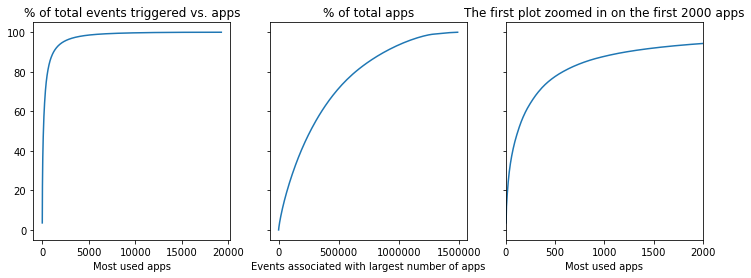

In [9]:
# The following plots may not be strictly correct. The first plot is counting events that are related 
# to more than one app multiple times, the second plot is counting a lot of apps more than once.
sum_app = vc_app.cumsum()/vc_app.sum()
sum_event = vc_event.cumsum()/vc_event.sum()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,4))
ax1.plot(np.arange(sum_app.shape[0])+1, sum_app.values*100)
ax1.set_xlabel('Most used apps') # By 'most used', I mean apps that triggered most events
ax1.set_title('% of total events triggered vs. apps') 
ax2.plot(np.arange(sum_event.shape[0])+1, sum_event.values*100)
ax2.set_xlabel('Events associated with largest number of apps')
ax2.set_title('% of total apps')
ax3.plot(np.arange(sum_app.shape[0])+1, sum_app.values*100)
ax3.set_xlabel('Most used apps')
ax3.set_xlim(0, 2000)
ax3.set_title('The first plot zoomed in on the first 2000 apps')

In [10]:
# Look at the 'app_label' table
print ('app_label table has {} rows,'.format(app_label.shape[0]))
# Check for missing values
print ('Number of missing values in each column:')
print (app_label.isnull().sum())
print ('There are {} unique app_ids.'.format(app_label.app_id.nunique()))
print ('There are {} unique label_ids.'.format(app_label.label_id.nunique())) 
# Check if any app_id in app_event is not in app_label table
print ('{} app_ids in app_event is not in app_label.'.format(sum(~app_id_list_app_event.isin(app_label.app_id))))
label_id_list_app_label = Series(app_label.label_id.unique())

app_label table has 459943 rows,
Number of missing values in each column:
app_id      0
label_id    0
dtype: int64
There are 113211 unique app_ids.
There are 507 unique label_ids.
0 app_ids in app_event is not in app_label.


In [11]:
# Look at the 'label_cat' table
print ('label_cat table has {} rows'.format(label_cat.shape[0]))
# Check for missing values
print ('Number of missing values in each column:')
print (label_cat.isnull().sum())
print ('There are {} repeated label_ids.'.format(sum(label_cat.label_id.duplicated())))
print ('There are {} repeated categories'.format(sum(label_cat.category.duplicated())))

label_cat table has 930 rows
Number of missing values in each column:
label_id    0
category    3
dtype: int64
There are 0 repeated label_ids.
There are 94 repeated categories


In [12]:
# Look at the 'event' table
# Look at the 'label_cat' table
print ('event table has {} rows'.format(event.shape[0]))
print ('with {} duplicated rows.'.format(sum(event.duplicated())))
# Check for missing values
print ('Number of missing values in each column:')
print (event.isnull().sum())
print ('There are {} repeated event_ids.'.format(sum(event.event_id.duplicated())))
print ('There are {} unique device_ids.'.format(event.device_id.nunique()))


event table has 3252950 rows
with 0 duplicated rows.
Number of missing values in each column:
event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
dtype: int64
There are 0 repeated event_ids.
There are 60865 unique device_ids.


In [13]:
# Create hour column for plotting
def get_hour(x):
    return int(x.split(' ')[1][:2])
event['hour'] = event.timestamp.map(get_hour)

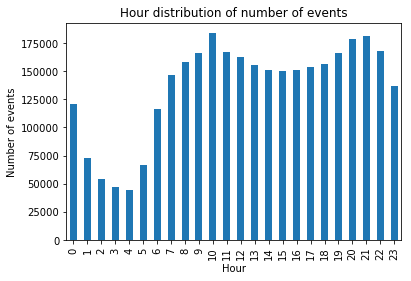

In [14]:
ax = event.hour.value_counts(sort=False).plot(kind='bar')
ax.set_title('Hour distribution of number of events')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of events')

In [15]:
# Check if all event_ids in event table are in app_event
print ('{} event_ids from event are not in app_event.'.format(sum(~event.event_id.isin(app_event.event_id))))

1764854 event_ids from event are not in app_event.


There are a lot of events that cannot be looked up from app_event table, so we won't be able to find out the related app information.

In [16]:
print (event.event_id.nunique())
print (app_event.event_id.nunique())
print ('{} event_ids from app_event are not in event table.'.format(app_event.event_id.nunique() + 1764854 - event.event_id.nunique()))

3252950
1488096
0 event_ids from app_event are not in event table.


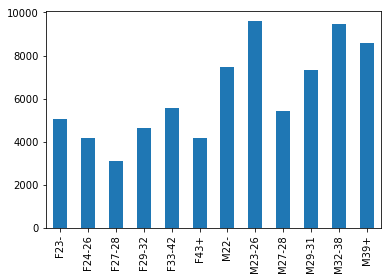

In [17]:
gatrain.group.value_counts().sort_index().plot(kind='bar')

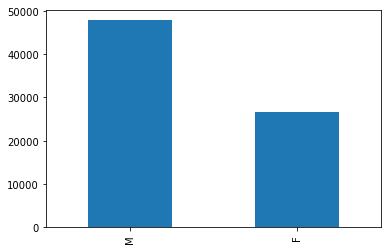

In [18]:
gatrain.gender.value_counts().plot(kind='bar')

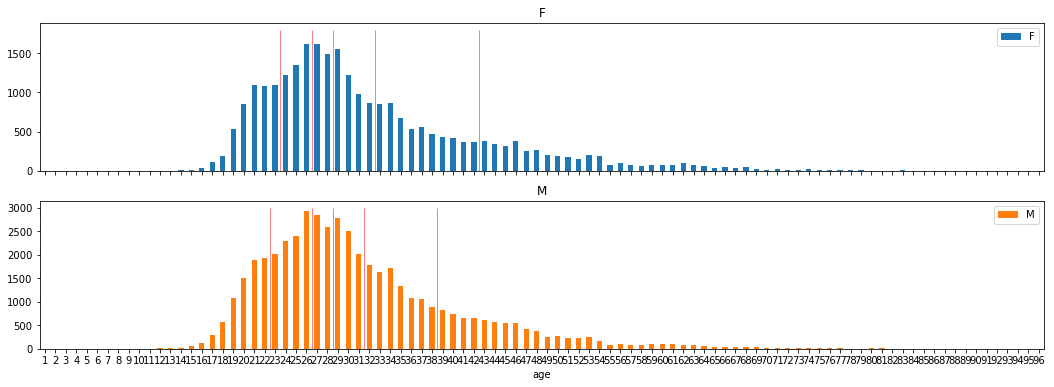

In [19]:
groups = gatrain.groupby(['age', 'gender']).size().unstack().reindex(index=np.arange(gatrain.age.min(), gatrain.age.max()+1)).fillna(0)
ax1, ax2 = groups.plot(kind='bar',figsize=(18,6),subplots=True)
plt.xticks(rotation=0)
ax1.vlines(np.array([23,26,28,32,42])-0.5,0,1800,alpha=0.5,linewidth=1,color='r')
ax2.vlines(np.array([22,26,28,31,38])-0.5,0,3000,alpha=0.5,linewidth=1,color='r')

In [20]:
# Look at the phone table
print('{} rows'.format(phone.shape[0]))
print ('with {} duplicated rows.'.format(sum(phone.duplicated())))
print("unique values:")
for c in phone.columns:
    print('{}: {}'.format(c, phone[c].nunique()))

187245 rows
with 523 duplicated rows.
unique values:
device_id: 186716
phone_brand: 131
device_model: 1599


In [21]:
# Drop duplicated rows
phone = phone.drop_duplicates()
# Check duplicated device_id
dup_phones = phone.groupby('device_id').size()
dup_phones = dup_phones[dup_phones>1]
dup_phones.shape

(6,)

In [22]:
dup_phones_list = phone[phone.device_id.isin(dup_phones.index)]
first = dup_phones_list.groupby('device_id').first()
last = dup_phones_list.groupby('device_id').last()

# print pd.merge(first, last, left_index=True, right_index=True)
print (pd.concat((first, last), axis=1))

                     phone_brand         device_model phone_brand device_model
device_id                                                                     
-7297178577997113203          华为               荣耀畅玩5X          华为         荣耀3C
-7059081542575379359          LG              Nexus 5          魅族     魅蓝Note 2
-6590454305031525112          小米                 MI 3          华为     荣耀6 Plus
-5269721363279128080          三星  Galaxy Core Advance          小米         MI 3
-3004353610608679970          酷派                 5891          酷派         7296
 5245428108336915020          魅族                  MX4          小米  MI One Plus


In [23]:
phone = phone.drop_duplicates('device_id', keep='first')
print (phone.phone_brand.value_counts())
print (phone.device_model.value_counts())

小米      43107
三星      34191
华为      32465
vivo    14342
OPPO    14239
魅族      11816
酷派       8382
联想       6752
金立       2763
HTC      2675
中兴       2092
乐视       1916
索尼       1818
努比亚      1142
LG        761
中国移动      668
TCL       583
朵唯        544
锤子        534
优米        492
海信        489
一加        437
语信        395
奇酷        376
天语        376
摩托罗拉      228
酷比        165
酷比魔方      152
ZUK       152
美图        150
        ...  
PPTV        5
欧乐迪         5
唯比          4
惠普          4
天宏时代        4
本为          4
宝捷讯         4
鲜米          3
大显          3
丰米          3
恒宇丰         2
飞秒          2
赛博宇华        2
MIL         2
原点          2
戴尔          2
凯利通         2
世纪星         2
ZOYE        1
宏碁          1
西门子         1
帷幄          1
碟米          1
德卡诺         1
极米          1
亚马逊         1
欧乐酷         1
E人E本        1
嘉源          1
瑞高          1
Name: phone_brand, dtype: int64
红米note             7343
MI 3               5699
MI 2S              5301
Galaxy Note 3      5010
MI 4              

In [24]:
# Do different brands use the same model name sometimes?
phone.groupby('device_model')['phone_brand'].nunique().value_counts()

1    1545
2      43
3       8
4       3
Name: phone_brand, dtype: int64

1545 models have unique brands, the rest model names are shared by multiple brands. Thus it might be necessary to prepend the models with the brands.

In [25]:
phone['device_brand_model'] = phone['phone_brand'].str.cat(phone['device_model'])
print (phone.head())

             device_id phone_brand   device_model device_brand_model
0 -8890648629457979026          小米             红米               小米红米
1  1277779817574759137          小米           MI 2             小米MI 2
2  5137427614288105724          三星      Galaxy S4        三星Galaxy S4
3  3669464369358936369       SUGAR           时尚手机          SUGAR时尚手机
4 -5019277647504317457          三星  Galaxy Note 2    三星Galaxy Note 2


9 most popular brands account for 90% of the devices
374 most popular models account for 90% of the devices


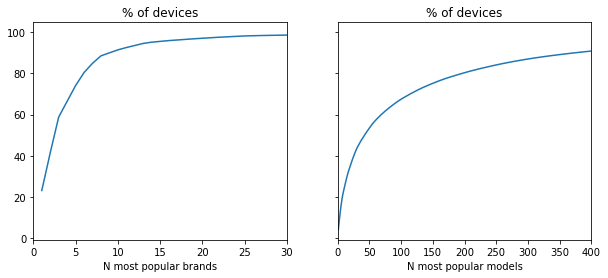

In [26]:
c_brand = phone.phone_brand.value_counts()
s_brand = c_brand.cumsum()/c_brand.sum()
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.plot(np.arange(s_brand.shape[0])+1, s_brand.values*100)
ax1.set_xlim(0,30)
ax1.set_xlabel('N most popular brands')
ax1.set_title('% of devices');
c_model = phone.device_brand_model.value_counts()
s_model = c_model.cumsum()/c_model.sum()
ax2.plot(np.arange(s_model.shape[0])+1, s_model.values*100)
ax2.set_xlim(0,400)
ax2.set_xlabel('N most popular models')
ax2.set_title('% of devices')
print ('{} most popular brands account for 90% of the devices'.format(s_brand.index.get_loc((s_brand >= 0.9).argmax()) + 1))
print ('{} most popular models account for 90% of the devices'.format(s_model.index.get_loc((s_model >= 0.9).argmax()) + 1))

In [27]:
train_phone = gatrain.merge(phone[['device_id','phone_brand','device_model']], how='left',on='device_id')
event_phone = event.merge(phone[['device_id','phone_brand','device_model']], how='left',on='device_id')
train_brand = train_phone.phone_brand.unique()
event_brand = event_phone.phone_brand.unique()
test_phone = gatest.merge(phone[['device_id','phone_brand','device_model']], how='left',on='device_id')
test_brand = test_phone.phone_brand.unique()

In [28]:
print (Series(train_brand).isin(event_brand).value_counts())
print (Series(test_brand).isin(event_brand).value_counts())

True     108
False     12
dtype: int64
True     114
False     12
dtype: int64


In [29]:
print (train_phone.phone_brand.isin(event_brand).value_counts())
print (test_phone.phone_brand.isin(event_brand).value_counts())

True     74626
False       19
Name: phone_brand, dtype: int64
True     112039
False        32
Name: phone_brand, dtype: int64
